In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
import pandas as pd
import csv
from nilearn import datasets, plotting
from mcmc import metropolis

### Get coordinates from NILearn

In [4]:
aal = datasets.fetch_atlas_aal()

In [5]:
data = datasets.fetch_development_fmri(n_subjects=1)

In [6]:
coordinates = plotting.find_parcellation_cut_coords(labels_img=aal['maps'])

### Plotting

In [9]:
#importing dti matrix
with open('Data/DTI_avg.csv', 'r') as file:
    reader = csv.reader(file, delimiter=',')
    data = list(reader)
DTI_log = pd.DataFrame(data, dtype = 'float64')
DTI= DTI_log.values
max_value = np.max(DTI)
DTI = DTI / max_value
n = 90

In [10]:
T = 0.00001
spins = np.random.choice([-1,1], size=90)
sim_data = metropolis(spins, 20000, T, DTI)

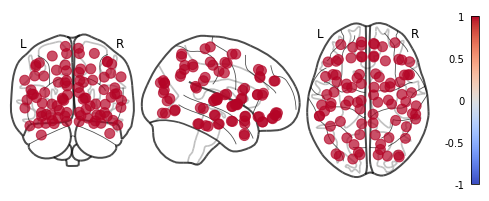

In [11]:
fig = plotting.plot_markers(
        sim_data[-1][0],
        coordinates[:90],
        node_cmap='coolwarm',
        node_vmin=-1,
        node_vmax=1
    )

### Animation

In [13]:
start = 0
stepsize = 100
steps = 5

MovieWriter ffmpeg unavailable; using Pillow instead.


0
0
1
2
3
4
0


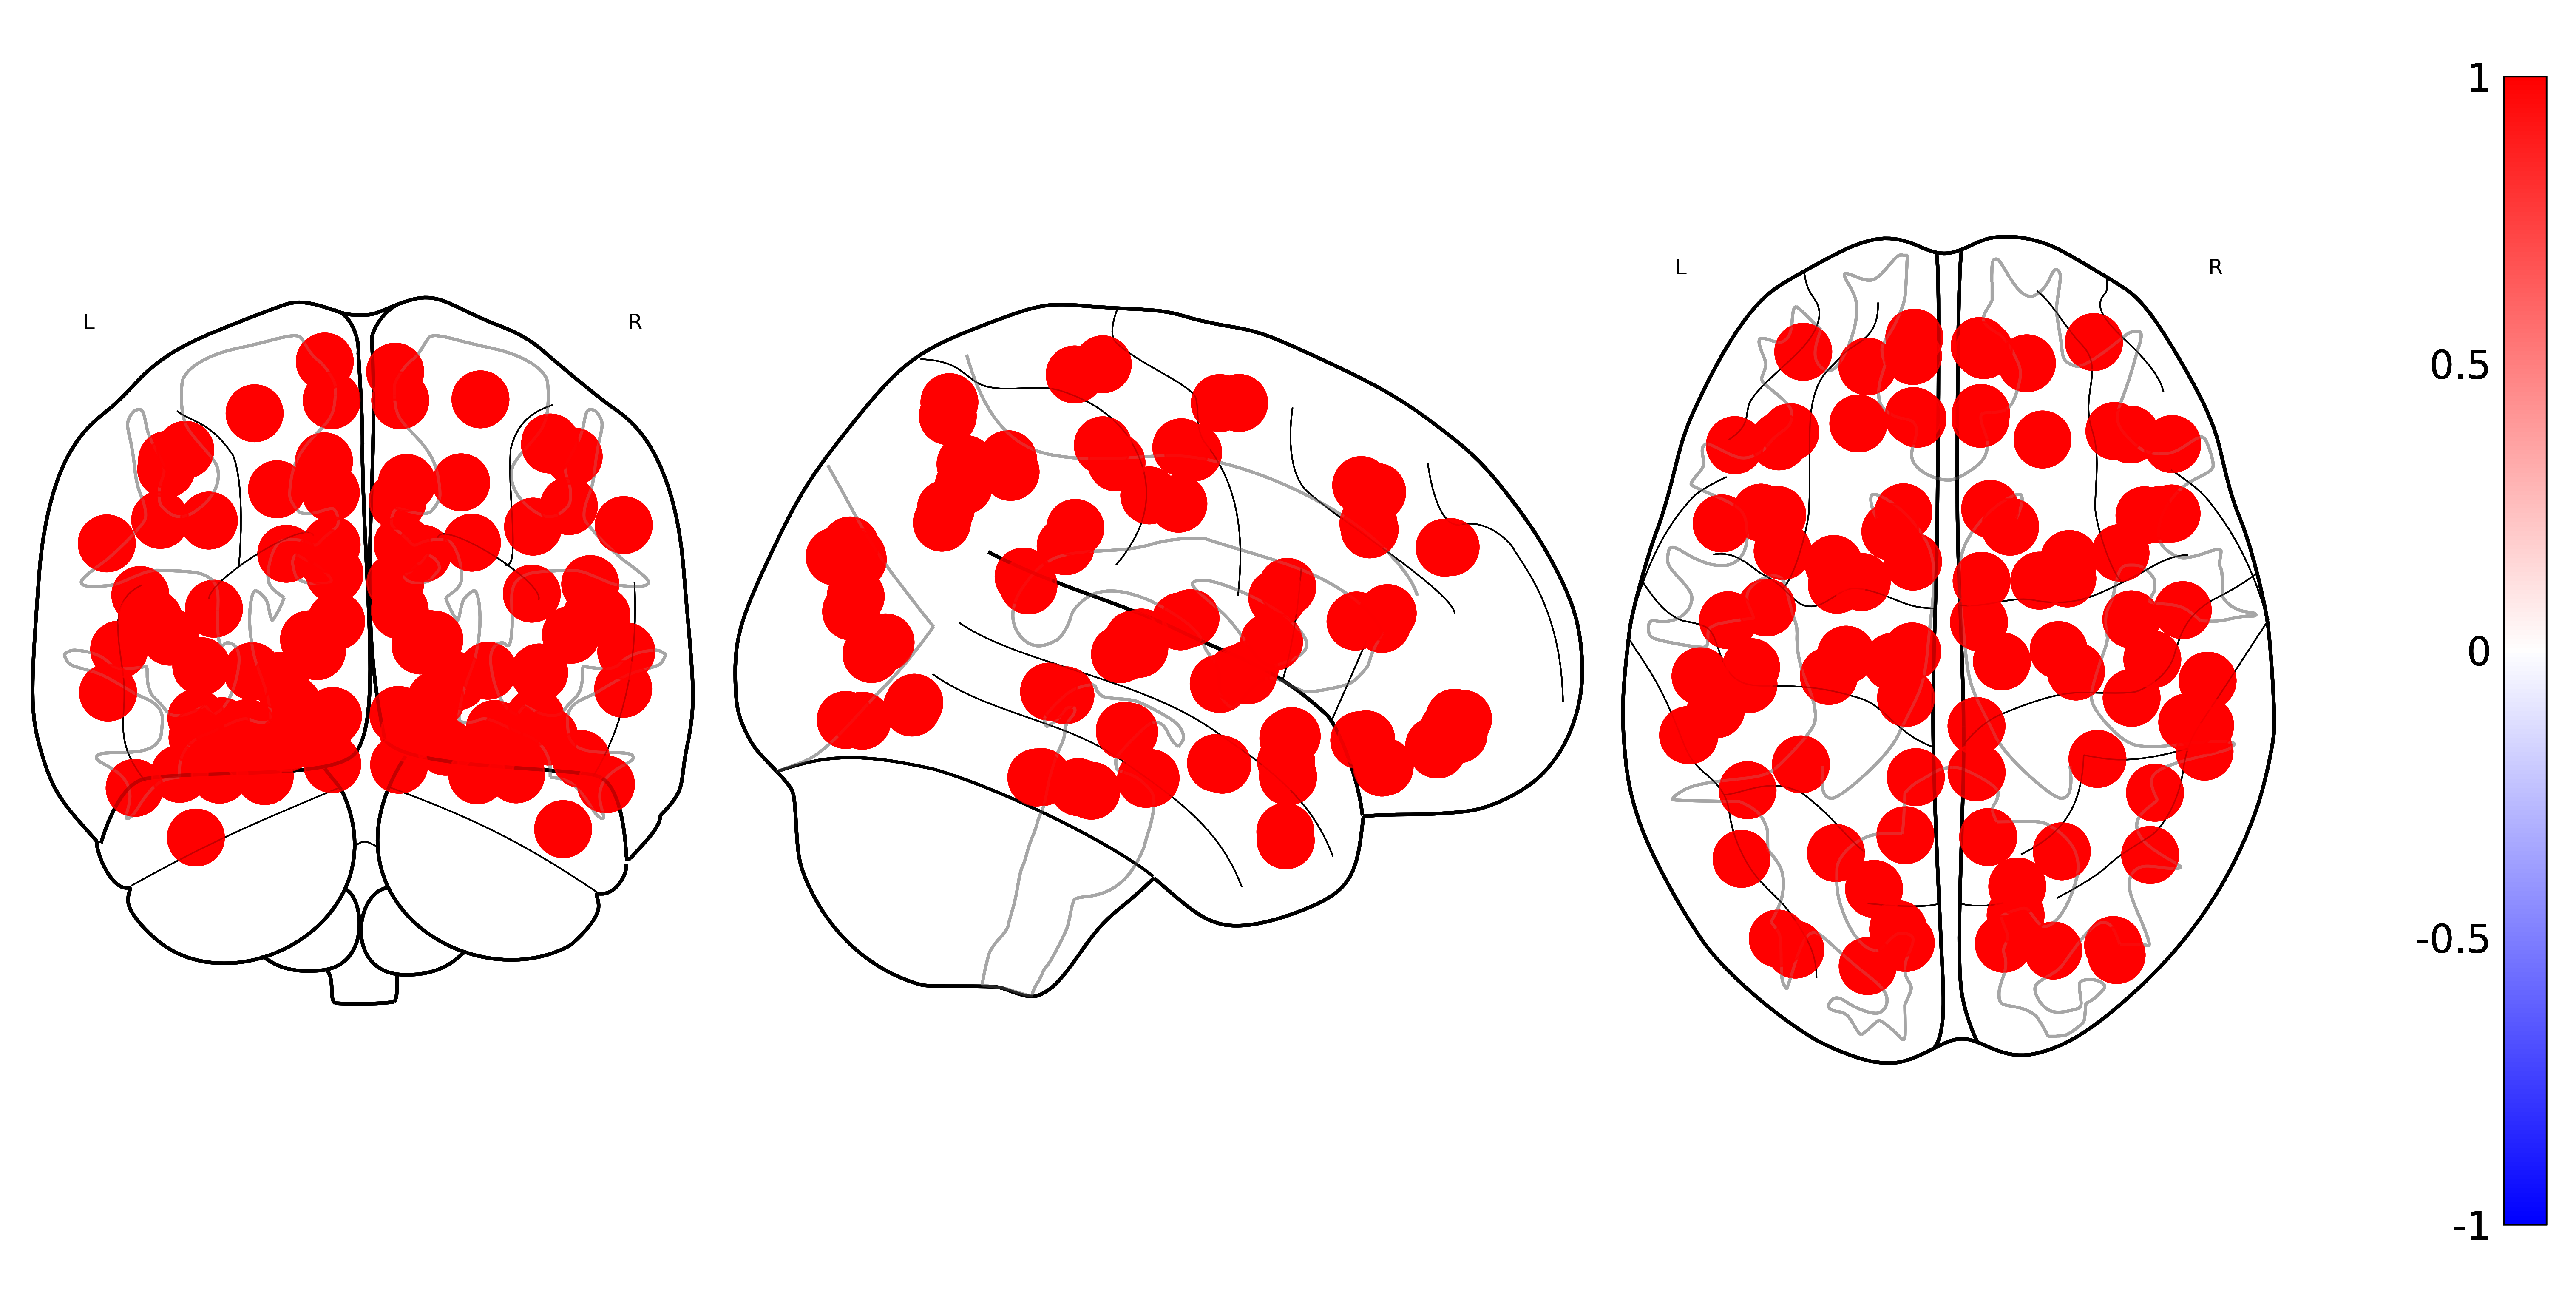

In [15]:
fig = plt.figure(figsize=[20,10], dpi=300)
plt.rcParams.update({'font.size': 22})

def update(i):
    print(i)
    plotting.plot_markers(
        sim_data[-1][int(start + stepsize *i)],
        coordinates[:90],
        node_cmap='bwr',
        node_vmin=-1,
        node_vmax=1,
        figure=fig,
        node_size=1000
    )

ani = matplotlib.animation.FuncAnimation(fig, update, frames=steps, interval=1)

ani.save(f'Results/animation_T={T} and {start}_{stepsize}_{steps}.gif', fps=10, savefig_kwargs={"facecolor": (1,1,1,1)})

### Side quest: look at distances

In [16]:
coordinates_df = pd.DataFrame(index=aal['labels'], data=coordinates, columns=['x', 'y', 'z'])

In [17]:
distances_i = []
distances_j = []
distances_dis = []
for row_i in coordinates_df[:90].iterrows():
    for row_j in coordinates_df[:90].iterrows():
        distances_i.append(row_i[0])
        distances_j.append(row_j[0])
        distances_dis.append(np.sqrt(np.sum([(row_i[1][i] - row_j[1][i])**2 for i in range(3)])))

In [18]:
distances = pd.DataFrame({'i':distances_i, 'j':distances_j, 'distance':distances_dis})
distances = pd.pivot(distances, index='i', columns='j', values='distance')
distances = distances.loc[coordinates_df.index[:90], coordinates_df.index[:90]]
distances

,Precentral_L,Precentral_R,Frontal_Sup_L,Frontal_Sup_R,Frontal_Sup_Orb_L,Frontal_Sup_Orb_R,Frontal_Mid_L,Frontal_Mid_R,Frontal_Mid_Orb_L,Frontal_Mid_Orb_R,...,Temporal_Sup_L,Temporal_Sup_R,Temporal_Pole_Sup_L,Temporal_Pole_Sup_R,Temporal_Mid_L,Temporal_Mid_R,Temporal_Pole_Mid_L,Temporal_Pole_Mid_R,Temporal_Inf_L,Temporal_Inf_R
Precentral_L,0.000000,80.079429,45.939775,71.235622,86.183706,101.858331,41.791291,87.230187,82.996841,111.209814,...,48.537736,107.593534,74.081733,112.090356,62.497317,113.929305,87.475211,119.188148,78.247566,120.574763
Precentral_R,80.079429,0.000000,74.366712,44.788252,103.566946,89.869366,86.990422,45.226850,111.559337,87.919874,...,105.425837,50.214504,111.221800,73.054919,114.056172,63.017209,118.302606,87.444551,119.875802,78.854224
Frontal_Sup_L,45.939775,74.366712,0.000000,40.583047,57.132420,68.793061,16.574141,56.810736,55.636015,76.252476,...,74.214318,101.597228,68.818092,91.404349,89.668349,113.432684,80.972022,99.520967,95.918756,117.028991
Frontal_Sup_R,71.235622,44.788252,40.583047,0.000000,70.771283,60.463030,56.018785,18.630745,77.377492,59.758610,...,98.344001,74.087735,90.338630,68.182963,111.078403,89.465474,98.658305,81.016184,114.588930,96.165427
Frontal_Sup_Orb_L,86.183706,103.566946,57.132420,70.771283,0.000000,35.018615,53.673237,73.471756,14.900230,50.073072,...,79.858251,103.587934,40.208039,72.525075,90.519366,112.933585,43.353813,71.538411,82.799466,105.362145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Temporal_Mid_R,113.929305,63.017209,113.432684,89.465474,112.933585,94.538655,120.570284,81.263033,124.547051,93.530005,...,112.159207,17.594178,112.104930,55.036957,113.088404,0.000000,112.035097,61.713025,109.771697,22.251794
Temporal_Pole_Mid_L,87.475211,118.302606,80.972022,98.658305,43.353813,67.110816,71.917891,102.308592,43.700066,82.516656,...,56.878837,109.119346,14.422273,86.275004,60.994934,112.035097,0.000000,80.605387,46.018396,101.492649
Temporal_Pole_Mid_R,119.188148,87.444551,99.520967,81.016184,71.538411,45.865676,104.674310,69.199606,86.027354,45.004050,...,110.846866,55.021706,85.005690,15.866339,114.879170,61.713025,80.605387,0.000000,103.599783,47.398134
Temporal_Inf_L,78.247566,119.875802,95.918756,114.588930,82.799466,102.454832,86.022290,121.072996,81.864278,116.282960,...,31.405646,112.122329,44.383669,107.081111,22.465072,109.771697,46.018396,103.599783,0.000000,103.449854


In [19]:
T = 1
spins = np.random.choice([-1,1], size=90)
sim_data = metropolis(spins, 10000, T, DTI)

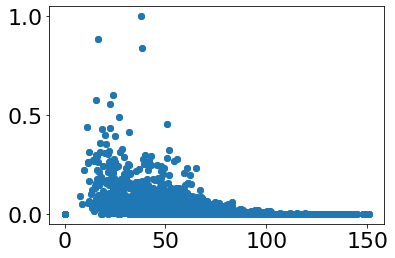

In [20]:
plt.scatter(distances, DTI)